# Proyek Analisis Data: Bike Sharing Dataset
>
Sumber Data
https://drive.google.com/file/d/1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ/view
>




- **Nama:** Muhamad Sahidul Akhfa
- **Email:** sahidakhfa@gmail.com
- **ID Dicoding:** sahidoel

## Menentukan Pertanyaan Bisnis

- Pada waktu kapan penyewaan banyak terjadi?
- Apakah ada kondisi tertentu yang mempengaruhi penyewaan?

## Import Semua Packages/Library yang Digunakan

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [371]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


membaca file csv, dari link gdrive

In [372]:
bdd = pd.read_csv('/content/drive/MyDrive/dataset/day.csv')
bdd.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


menampilkan data

In [373]:
bdh = pd.read_csv('/content/drive/MyDrive/dataset/hour.csv')
bdh.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data


Data Bike Sharing per Jam

In [374]:
bdh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [375]:
bdh.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [376]:
bdh.duplicated().sum()

0

In [377]:
bdh.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Data Bike Sharing per Hari

In [378]:
bdd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [379]:
bdd.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [380]:
bdd.duplicated().sum()

0

In [381]:
bdd.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Data Bike Sharing per jam dan per hari bersih dari duplicated dan null
- Tipe data dtday belum datetime

### Cleaning Data

membersihkan data bike sharing per jam

memperbaiki tipe data

In [382]:
bdh['dteday'] = pd.to_datetime(bdh['dteday'])
print(bdh.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


menghapus kolom yang tidak digunakan

In [383]:
bdh.drop('instant', axis=1, inplace=True)
bdh.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [384]:
bdh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

Pengecekan outliers

<Axes: >

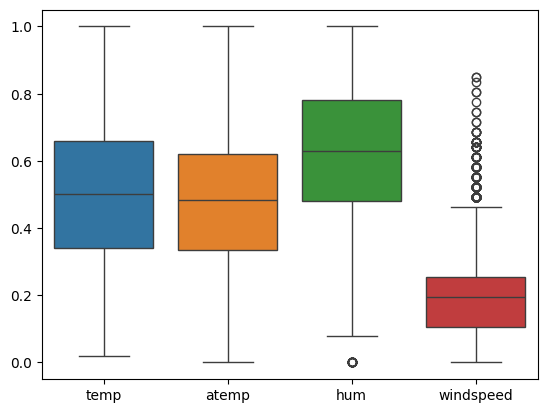

In [385]:
sns.boxplot(data=bdh[['temp', 'atemp', 'hum', 'windspeed']])

mengganti nilai outliers winspeed dengan mean (imputation)

In [386]:
Q1_windspeed = bdh['windspeed'].quantile(0.25)
Q3_windspeed = bdh['windspeed'].quantile(0.75)
IQR_windspeed = Q3_windspeed - Q1_windspeed

lower_bound_windspeed = Q1_windspeed - 1.5 * IQR_windspeed
upper_bound_windspeed = Q3_windspeed + 1.5 * IQR_windspeed

mean_windspeed = bdh['windspeed'].mean()

bdh['windspeed'] = bdh['windspeed'].apply(lambda x: mean_windspeed if x < lower_bound_windspeed or x > upper_bound_windspeed else x)

mengganti nilai outliers humidity dengan mean (imputation)

In [387]:
Q1_hum = bdh['hum'].quantile(0.25)
Q3_hum = bdh['hum'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum

lower_bound_hum = Q1_hum - 1.5 * IQR_hum
upper_bound_hum = Q3_hum + 1.5 * IQR_hum

mean_hum = bdh['hum'].mean()

bdh['hum'] = bdh['hum'].apply(lambda x: mean_hum if x < lower_bound_hum or x > upper_bound_hum else x)

<Axes: >

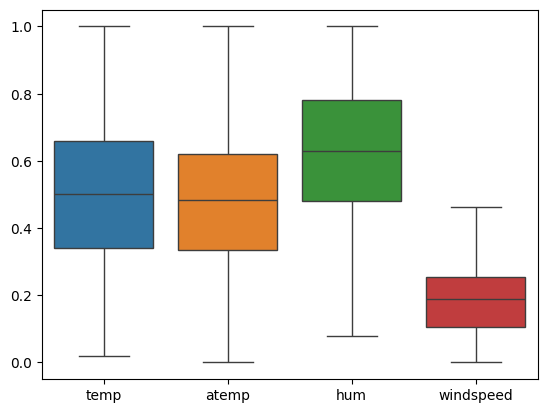

In [388]:
sns.boxplot(data=bdh[['temp', 'atemp', 'hum', 'windspeed']])

memperbaiki data bike share per hari

memperbaiki tipe data

In [389]:
bdd['dteday'] = pd.to_datetime(bdd['dteday'])
print(bdd.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


menghapus kolom yang tidak digunakan

In [390]:
bdd.drop('instant', axis=1, inplace=True)
bdd.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [391]:
bdh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

Pengecekan outliers

<Axes: >

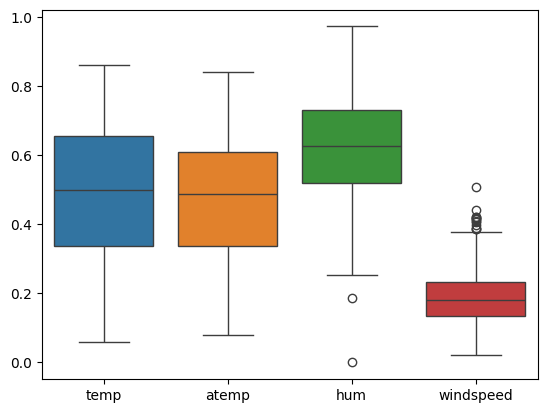

In [392]:
sns.boxplot(data=bdd[['temp', 'atemp', 'hum', 'windspeed']])

mengganti nilai outliers winspeed dengan mean (imputation)

In [393]:
Q1_windspeed = bdd['windspeed'].quantile(0.25)
Q3_windspeed = bdd['windspeed'].quantile(0.75)
IQR_windspeed = Q3_windspeed - Q1_windspeed

lower_bound_windspeed = Q1_windspeed - 1.5 * IQR_windspeed
upper_bound_windspeed = Q3_windspeed + 1.5 * IQR_windspeed

mean_windspeed = bdd['windspeed'].mean()

bdd['windspeed'] = bdd['windspeed'].apply(lambda x: mean_windspeed if x < lower_bound_windspeed or x > upper_bound_windspeed else x)

mengganti nilai outliers humidity dengan mean (imputation)

In [394]:
Q1_hum = bdd['hum'].quantile(0.25)
Q3_hum = bdd['hum'].quantile(0.75)
IQR_hum = Q3_hum - Q1_hum

lower_bound_hum = Q1_hum - 1.5 * IQR_hum
upper_bound_hum = Q3_hum + 1.5 * IQR_hum

mean_hum = bdd['hum'].mean()

bdd['hum'] = bdd['hum'].apply(lambda x: mean_hum if x < lower_bound_hum or x > upper_bound_hum else x)

<Axes: >

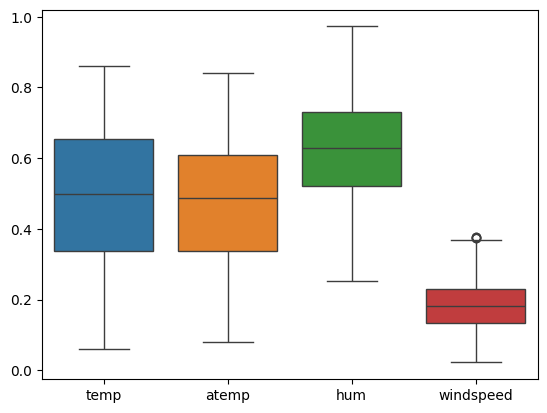

In [395]:
sns.boxplot(data=bdd[['temp', 'atemp', 'hum', 'windspeed']])

**Insight:**
- terdapat outliers di kolom humidity dan winspeed baik itu data per jam maupun per hari

## Exploratory Data Analysis (EDA)

### Explore ...

**Explore data bike sharing per jam**

melihat korelasi variabel numerik dalam heatmap

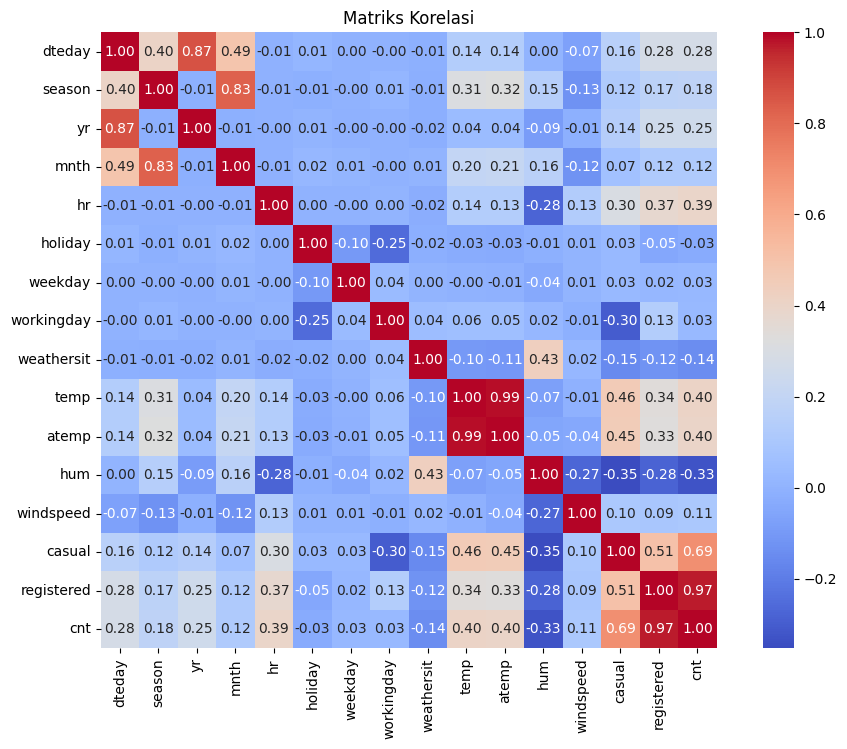

In [396]:
plt.figure(figsize=(12, 8))
correlation_matrix = bdh.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

**Explore data bike sharing per hari**

melihat korelasi variabel numerik dengan heatmap

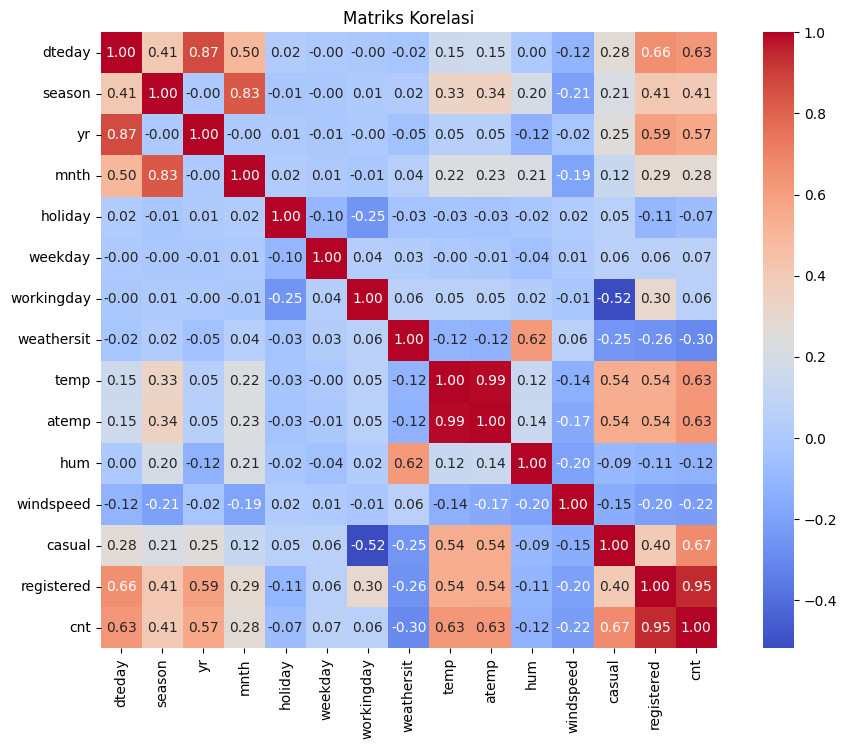

In [397]:
plt.figure(figsize=(12, 8))
correlation_matrix = bdd.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriks Korelasi')
plt.show()

**Explore All Data**

Dikarenakan pada tabel bike sharing itu sudah memuat data, maka tidak perlu lagi untuk menggabungkan kedua data tersebut, dan untuk kedepaannya kita cukup memakai data Bike Sharing per Hour saja. Untuk memudahkan agar tidak keliru kita perlu mengubah nama dataframe dbh sebelumnya menjadi all_df

In [398]:
all_df = bdh

Mengubah variabel numerik ke dalam bentuk string agar mudah dalam interpretasi data

In [399]:
all_df['mnth'] = all_df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April',
                                        5: 'May', 6: 'June', 7: 'July', 8: 'August',
                                        9: 'September', 10: 'October', 11: 'November', 12: 'December'})

all_df['weekday'] = all_df['weekday'].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})

all_df['season'] = all_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})

all_df['weathersit'] = all_df['weathersit'].map({1: 'Clear', 2: 'Mist', 3: 'Rain', 4: 'Heavy Rain' })

all_df['yr'] = all_df['yr'].map({0: '2011', 1: '2012'
})
all_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,Spring,2011,January,0,0,Sunday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,Spring,2011,January,1,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,Spring,2011,January,2,0,Sunday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,Spring,2011,January,3,0,Sunday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,Spring,2011,January,4,0,Sunday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [400]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   yr          17379 non-null  object        
 3   mnth        17379 non-null  object        
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  object        
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

melihat tipe penyewa di setiap tahun dan bulan

In [401]:
all_df.groupby(by=["yr", "mnth"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

casual  registered     cnt
yr   mnth                                 
2012 September   43778      174795  218573
     August      43197      171306  214503
     July        41705      161902  203607
     June        43294      159536  202830
     October     34538      164303  198841
     May         44235      151630  195865
     April       38456      135768  174224
     March       31618      133257  164875
     November    21009      131655  152664
2011 June        30612      112900  143512
     July        36452      104889  141341
     August      28842      107849  136691
     May         31050      104771  135821
     September   26545      100873  127418
2012 December    13245      110468  123713
2011 October     25222       98289  123511
2012 February     8721       94416  103137
2011 November    15594       86573  102167
2012 January      8969       87775   96744
2011 April       22346       72524   94870
     December     8448       78875   87323
     March       12826       51219   64045
     February     6242       41973   48215
     January      3073       35116   38189

melihat tipe penyewa di setiap jam

In [402]:
all_df.groupby(by=["hr"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
hr,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


melihat tipe penyewa di setiap season

In [403]:
all_df.groupby(by=["season"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Spring,60622,410726,471348


melihat tipe penyewa di setiap cuaca

In [404]:
all_df.groupby(by=["weathersit"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weathersit,,,
Clear,462745,1875428,2338173
Mist,134481,661471,795952
Rain,22783,135548,158331
Heavy Rain,8,215,223


melihat tipe penyewa di setiap hari

In [405]:
all_df.groupby(by=["weekday"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
weekday,,,
Saturday,78238,409552,487790
Friday,61460,423935,485395
Sunday,153852,323955,477807
Thursday,57319,415729,473048
Wednesday,57843,411266,469109
Tuesday,70784,384719,455503
Monday,140521,303506,444027


melihat tipe penyewa di setiap temperature
note : pada data ini nilai temperature dalam celcius sudah dibagi 41

In [406]:
all_df.groupby(by=["temp"]).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
}).sort_values(by="cnt", ascending=False)

,casual,registered,cnt
temp,,,
0.70,37087,140211,177298
0.72,39157,124292,163449
0.74,38393,123194,161587
0.66,32786,123418,156204
0.64,32758,122227,154985
0.60,29442,120463,149905
0.62,29609,118576,148185
0.76,32675,102985,135660
0.56,23913,99843,123756


In [407]:
all_df.to_csv("all_data.csv", index=False)

**insight**
- Terlihat dari Heatmap, Penyewa baik itu casual maupun registered sedikit memperhatikan atau terpengaruh mengenai jam, temp, atemp dalam penyewaan .
- Penyewaaan banyak terjadi pada fall season, dan sedikit pada spring season, ini membuktikan season berpengaruh terhadapa penyewaan.
- Penyewaan banyak terjadi pada cuaca cerah, dan sedikit pada saat hujan lebat
- Penyewaan banyak di pagi hari jam 8, dan di sore hari jam 17-18, yang mana ini sesuai dengan kebiasaan orang orang bahwa sering ber olahraga di pagi dan sore hari
- Penyewaan banyak pada weekend, orang orang sering menghabiskan waktu untuk berlibur
- Penyewaan banyak di pertengahan tahun
- Penyewaan cenderung sedikit pada suhu yang terlalu dingin

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada waktu kapan penyewaan paling banyak terjadi?

Melihat penyewaan di setiap jam

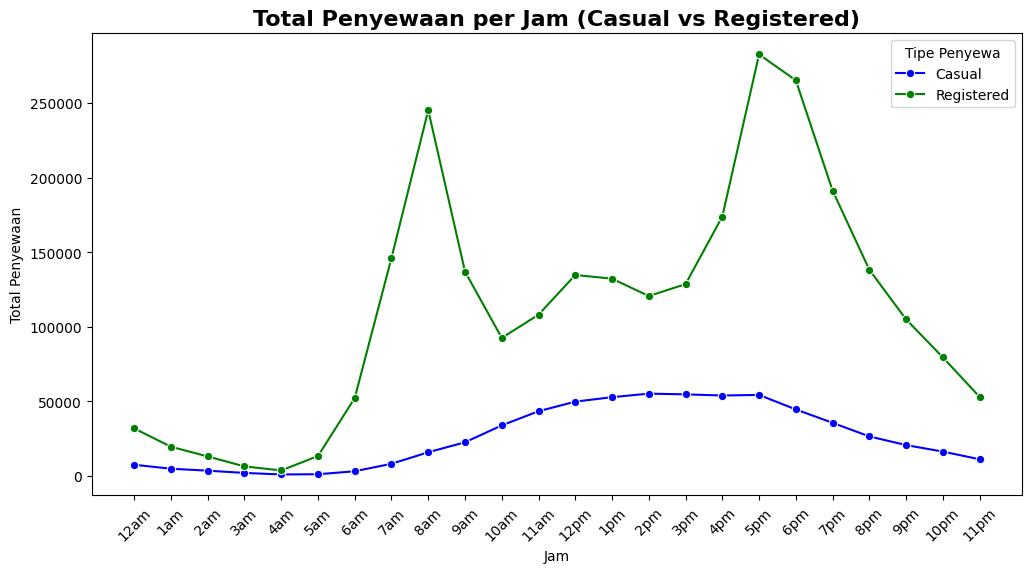

In [408]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='hr', y='casual', data=all_df, estimator=sum, label='Casual', errorbar=None, color='blue', marker='o')

sns.lineplot(x='hr', y='registered', data=all_df, estimator=sum, label='Registered', errorbar=None, color='green', marker='o')

plt.title('Total Penyewaan per Jam (Casual vs Registered)',fontsize=16, fontweight='bold')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')

plt.xticks(ticks=range(24),
           labels=['12am', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am',
                   '12pm', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'],
           rotation=45)

plt.legend(title='Tipe Penyewa')

plt.show()

melihaat sewaan per hari

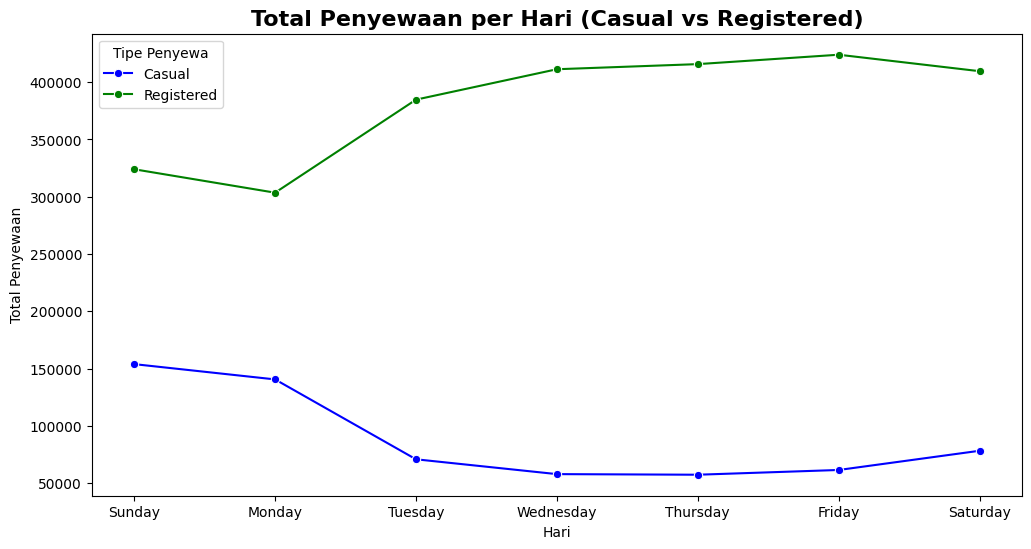

In [409]:
plt.figure(figsize=(12, 6))

sns.lineplot(y='casual', x='weekday', data=all_df, estimator=sum, label='Casual', errorbar=None, color='blue', marker='o')

sns.lineplot(y='registered', x='weekday', data=all_df, estimator=sum, label='Registered', errorbar=None, color='green', marker='o')

plt.title('Total Penyewaan per Hari (Casual vs Registered)',fontsize=16, fontweight='bold')
plt.xlabel('Hari')
plt.ylabel('Total Penyewaan')

plt.legend(title='Tipe Penyewa')

plt.show()

melihat sewaan per bulan

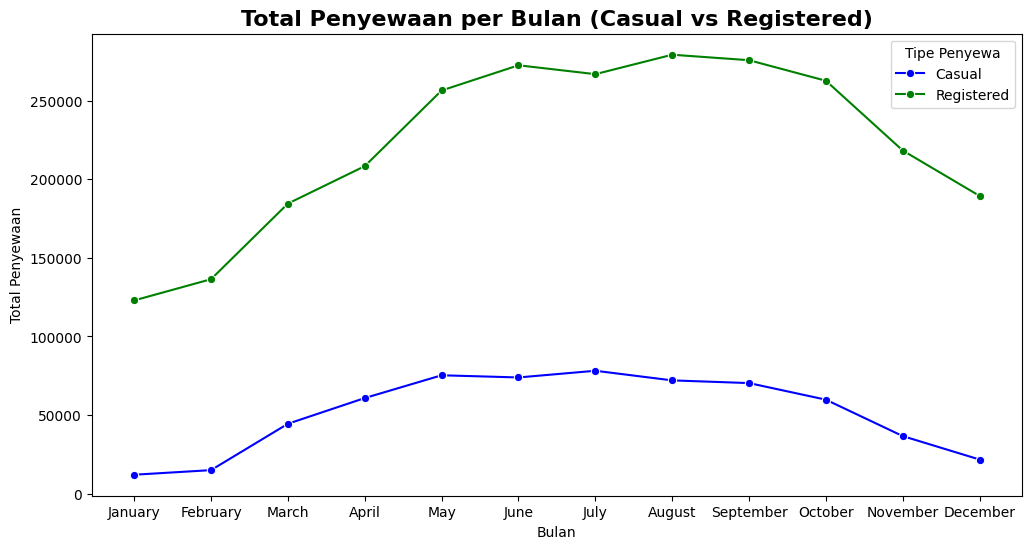

In [410]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='mnth', y='casual', data=all_df, estimator=sum, label='Casual', errorbar=None, color='blue', marker='o')

sns.lineplot(x='mnth', y='registered', data=all_df, estimator=sum, label='Registered', errorbar=None, color='green', marker='o')

plt.title('Total Penyewaan per Bulan (Casual vs Registered)',fontsize=16, fontweight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')

plt.legend(title='Tipe Penyewa')

plt.show()

### Pertanyaan 2: Apakah ada kondisi tertentu yang mempengaruhi penyewaan?

melihat penyewaan per season

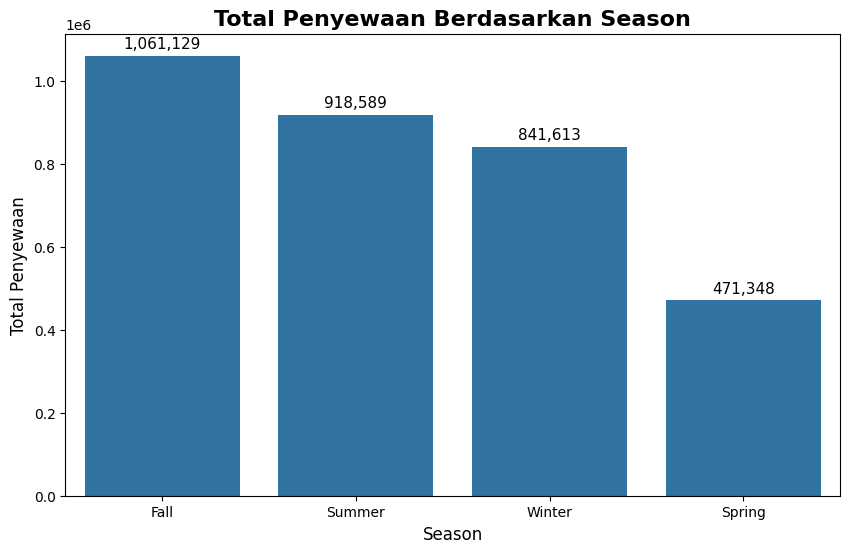

In [411]:
season_order = all_df.groupby('season')['cnt'].sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='season', y='cnt', data=all_df, estimator=sum, errorbar=None, order=season_order)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Total Penyewaan Berdasarkan Season', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)

plt.show()


melihat penyewaan berdasarkan situasi cuaca

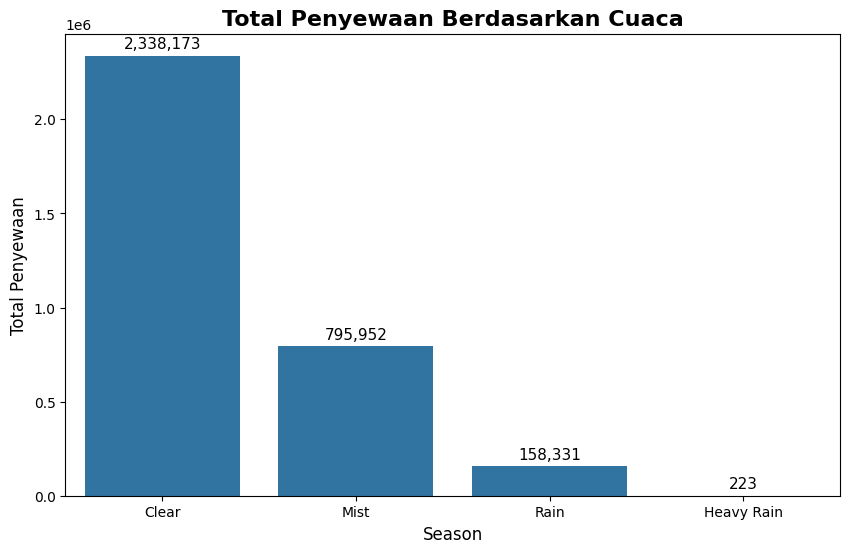

In [412]:
weather_order = all_df.groupby('weathersit')['cnt'].sum().sort_values(ascending=False).index

plt.figure(figsize=(10, 6))

ax = sns.barplot(x='weathersit', y='cnt', data=all_df, estimator=sum, errorbar=None, order=weather_order, color='blue')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

barplot = sns.barplot(x='weathersit', y='cnt', data=all_df, estimator=sum, errorbar=None, order=weather_order)

plt.title('Total Penyewaan Berdasarkan Cuaca', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)

plt.show()

melihat tipe penyewa berdasarkan temperature

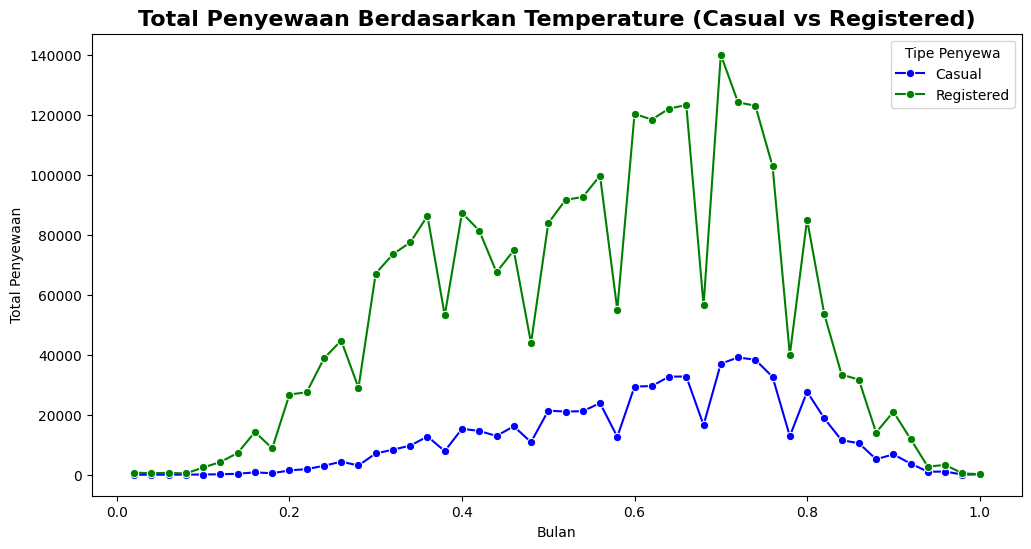

In [413]:
plt.figure(figsize=(12, 6))

sns.lineplot(x='temp', y='casual', data=all_df, estimator=sum, label='Casual', errorbar=None, color='blue', marker='o')

sns.lineplot(x='temp', y='registered', data=all_df, estimator=sum, label='Registered', errorbar=None, color='green', marker='o')

plt.title('Total Penyewaan Berdasarkan Temperature (Casual vs Registered)',fontsize=16, fontweight='bold')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan')

plt.legend(title='Tipe Penyewa')

plt.show()

**Insight:**
- Dari segi jam, penyewa casual itu banyak di siang menuju sore hari, sedangkan registered itu banyak di pagi hari dan sore hari
- Dari segi hari, penyewa casual itu banyak di weekend dan monday, sedangkan registered itu paling sedikit di monday dan banyak di weekend, yang mana ini membuktikan hari libur mempengaruhi penyewaan
- Dari segi bulan, penyewa baik itu casual maupun registered sama sama meningkat di pertengahan tahun sampai october, yang mana bulan bulan tersebut menunjukkan bahwa pada saat itu terjadi season summer dan fall, dan menurun di akhir tahun sampai awal tahun yang mana ini sedang terjadi winter dan spring
- Dari segi temperature, baik itu penyewa casual maupun registered itu sedikit di suhu yang rendah dan suhu yang tinggi.
- Penyewaan pada jam tertentu itu selaras dengan temperature, yang mana pada malam hari dengan suhu yang dingin dan siang hari di suhu yang tinggi mengakibatkan penurunan penyewaan sepeda

## Analisis Lanjutan (Opsional)

## Conclusion

- Waktu mempengaruhi penyewaan, yang mana pada pagi dan sore hari, weekend, pertengahan tahun itu paling banyak terjadi penyewaan.
- Penyewaan sepeda cenderung lebih rendah pada jam-jam larut malam dan dini hari.
- Kondisi tertentu sangat mempengaruhi penyewaan seperti season, weathersit, dan juga temperatur.
- Penyewaan sepeda tertinggi terjadi selama summer dan fall season, yang masuk akal mengingat cuaca yang lebih kondusif untuk aktivitas luar ruangan. Sebaliknya, winter dan spring season menunjukkan penurunan signifikan dalam penyewaan.
- Cuaca cerah dan mist mendukung jumlah penyewaan yang lebih tinggi, sedangkan cuaca buruk menyebabkan penurunan drastis dalam penyewaan.
- Suhu yang lebih hangat tetapi tidak terlalu panas meningkatkan penyewaan sepeda, dengan jumlah penyewaan tertinggi terjadi pada suhu sedang. Suhu yang ekstrem, baik terlalu panas atau terlalu dingin, cenderung menurunkan minat untuk menyewa sepeda.
